# Assignment 4

### 1. 复习上课内容以及复现课程代码

在本部分，你需要复习上课内容和课程代码后，自己复现课程代码。

### 2. 回答一下理论题目

#### 1. What does a neuron compute?

Ans: 神经元计算，模仿生物神经元的生物机理，简化出一种计算模型，接收多个输入，对每个输入乘上一个权重值，加上一个偏移量 ，然后在输出上加个激活函数，这样的计算过程便是神经元计算。

####  2. Why we use non-linear activation funcitons in neural networks?

Ans： 一方面是因为没有非线性激活函数的神经网络输出的值只能是线性的，而现实中很多情况是非线性的，在神经网络中加入非线性激活函数才更好地拟合现实中非线性的情况。
    另一方面多层神经网络中，层与层之间若没有非线性激活函数相连，那么多层神经网络可以简化为一层。


#### 3. What is the 'Logistic Loss' ?

Ans: 逻辑回归模型使用的Loss函数为Logistic Loss函数

$$ LogisticLoss = - y log \hat y - (1 - y)log(1 - \hat y)  $$

$$ \hat y 是模型预测值， y是真实值 $$

#### 4. Assume that you are building a binary classifier for detecting if an image containing cats, which activation functions would you recommen using for the output layer ?

A. ReLU    
B. Leaky ReLU    
C. sigmoid    
D. tanh  

Ans: 二分类输出概率，选择答案：C sigmoid 

#### 5. Why we don't use zero initialization for all parameters ?

Ans： 对于WX + b，对W矩阵的初始化不使用全0来初始化，是因为全0会导致所有的梯度下降反向传递后各个分支的W值完全相同，然后难以收敛到一个期望的状态。对于b来说则无所谓，全0初始化也没关系。

#### 6. Can you implement the softmax function using python ? 

softmax 函数输入输出都是至少是个一维向量，并且输入向量和输出向量的维度是相等的。
其中输入向量Z ,输出Y，z和y为Z和Y中的元素

##  $$ y_n = \frac {  e^{z_n}  }{  \sum_{j=1}^m {e^{z_j}}  } $$

n ： 当前的第n个元素

m ： 输入的元素个数

In [1]:
import math

def softmax(Z:[]):
    sumValue = sum([math.e ** z for z in Z])
    return [math.e ** z / sumValue for z in Z]

print(softmax([1,2,3,4,5]))
print(sum(softmax([1,2,3,4,5])))
print(softmax([1,2,3,4,5, -5]))
print(sum(softmax([1,2,3,4,5, -5])))

[0.011656230956039609, 0.03168492079612427, 0.0861285444362687, 0.23412165725273662, 0.6364086465588308]
1.0
[0.011655894183363012, 0.03168400535307716, 0.08612605600406874, 0.2341148929927061, 0.6363902593937069, 2.889207307800382e-05]
0.9999999999999999


### 3.实践题

#### In this practical part, you will build a simple digits recognizer to check if the digit in the image is larger than 5. This assignmnet will guide you step by step to finish your first small project in this course .

#### 1 - Packages  
sklearn is a famous package for machine learning.   
matplotlib is a common package for vasualization.

In [5]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#### 2 - Overvie of the dataset  
    - a training set has m_train images labeled as 0 if the digit < 5 or 1 if the digit >= 5
    - a test set contains m_test images labels as if the digit < 5 or 1 if the digit >= 5
    - eah image if of shape (num_px, num_px ). Thus, each image is square(height=num_px and  width = num_px)

1797
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


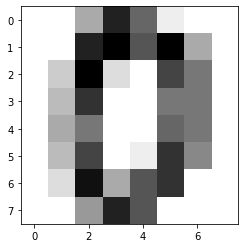

In [6]:
# Loading the data 
digits = datasets.load_digits()
print(len(digits.data))
print(digits.data[0])
plt.imshow(digits.data[0].reshape([8,8]),cmap=plt.cm.gray_r)

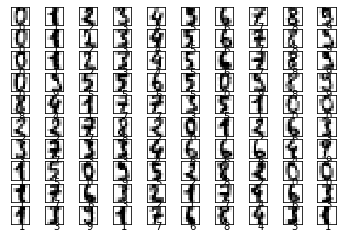

In [7]:
# Vilizating the data
count = 100
for i in range(0, count):
    plt.subplot(count / 10, 10,i+1)
    plt.imshow(digits.data[i].reshape([8,8]),cmap=plt.cm.gray_r)
    plt.text(3,10,str(digits.target[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()

In [8]:
# Split the data into training set and test set 
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25)

print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

1347
450
1347
450


In [9]:
# reformulate the label. 
# If the digit is smaller than 5, the label is 0.
# If the digit is larger than 5, the label is 1.

y_train[y_train < 5 ] = 0
y_train[y_train >= 5] = 1
y_test[y_test < 5] = 0
y_test[y_test >= 5] = 1

In [7]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1347, 64)
(450, 64)
(1347,)
(450,)


#### 3- Architecture of the neural network

![title](./networks.png)

In [8]:
!pwd

'pwd' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


##### Mathematical expression of the algorithm:

For one example $x^{(i)}$:   
 $$ z^{(i)} = w^T * x^{(i)} +b $$   
 $$ y^{(i)} = a^{(i)} = sigmoid(z^{(i)})$$   
 $$L(a^{(i)},y^{(i)}) = -y^{(i)} log(a^{(i)})-(1-y^{(i)})log(1-a^{(i)})$$

The total cost over all training examples:
$$ J = \frac{1}{m}\sum_{i=1}^{m}L(a^{(i)},y^{(i)}) $$

#### 4 - Building the algorithm

##### 4.1- Activation function    
###### Exercise:
Finish the sigmoid funciton 

In [8]:
import numpy as np

In [9]:

def sigmoid(z):
    '''
    Compute the sigmoid of z
    Arguments: z -- a scalar or numpy array of any size.
    
    Return:
    s -- sigmoid(z)
    '''
    s = 1 / (1 + np.e**-z)
    
    return s

print(sigmoid(-float('inf')))
print(sigmoid(-3))
print(sigmoid(-2))
print(sigmoid(-0.5))
print(sigmoid(0))
print(sigmoid(0.5))
print(sigmoid(float('inf')))

0.0
0.04742587317756679
0.11920292202211757
0.3775406687981454
0.5
0.6224593312018546
1.0


In [11]:
# Test your code 
# The result should be [0.5 0.88079708]
print("sigmoid([0,2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0,2]) = [0.5        0.88079708]


##### 4.1-Initializaing parameters
###### Exercise:
Finishe the initialize_parameters function below

In [10]:
# Random innitialize the parameters

def initialize_parameters(dim):
    '''
    Argument: dim -- size of the w vector
    
    Returns:
    w -- initialized vector of shape (dim,1)
    b -- initializaed scalar
    '''
    
    w = np.random.randn(dim, 1) / 10
    b = 0.00005
    
    assert(w.shape == (dim,1))
    assert(isinstance(b,float) or isinstance(b,int))
    
    return w,b

w,b = initialize_parameters(64)
w,b

(array([[ 0.04230681],
        [-0.00834512],
        [ 0.05070159],
        [-0.00691334],
        [-0.1026673 ],
        [-0.176531  ],
        [-0.19239761],
        [-0.02496467],
        [-0.07353267],
        [-0.053589  ],
        [-0.0851216 ],
        [ 0.0880719 ],
        [-0.08753393],
        [-0.00227891],
        [ 0.08216454],
        [ 0.00987154],
        [-0.04576888],
        [ 0.02414635],
        [ 0.04400698],
        [-0.04072405],
        [-0.00109133],
        [ 0.11143839],
        [-0.07801846],
        [-0.05353187],
        [ 0.08171822],
        [-0.00209969],
        [-0.02041528],
        [-0.13338999],
        [ 0.13780403],
        [-0.08499727],
        [ 0.06773399],
        [ 0.02688187],
        [ 0.12892663],
        [-0.15394725],
        [-0.05065211],
        [ 0.12114114],
        [-0.03845465],
        [-0.03577652],
        [ 0.15736156],
        [-0.05594688],
        [ 0.01846992],
        [-0.17644366],
        [-0.00053124],
        [ 0

#### 4.3-Forward and backward propagation

###### Some mathematical expressions
Forward Propagation:   
. X    
. A = $\sigma(w^T*X+b) = (a^{(1)},a^{(2)},...,a^{(m)}$   
. J = $-\frac{1}{m} \sum_{i=1}^{m}y^{(i)}log(a^{(i)})+(1-y^{(i)})log(1-a^{(i)})$       

Some derivative: 
$$\frac{\partial{J}}{\partial{w}} = \frac{1}{m}X*(A-Y)^T$$   
$$\frac{\partial{J}}{\partial{b}} = \frac{1}{m}\sum_{i=1}^m(a^{(i)}-y^{(i)}) $$

###### Exercise:
Finish the function below:

In [11]:
def propagate(w,b,X,Y):
    '''
    Implement the cost function and its gradient for the propagation
    
    Arguments:
    w - weights
    b - bias
    X - data
    Y - ground truth
    '''
    m = X.shape[1]
#     print(m, "w.shape", w.shape, 'X.shape', X.shape)
    A = sigmoid(np.dot(X, w) + b).reshape(-1)
#     print("A.shape", A.shape, "Y.shape", Y.shape, (A - Y).shape)
    cost = -1/m * np.sum([y * np.log(a) + (1 - y)* np.log(1 - a) for y, a in zip(Y, A)])
    
    dw = 1/m * np.dot(X.T , (A - Y)).reshape(-1,1)
#     print("dw.shape", dw.shape)
    db = 1/m * np.sum([a - y for y, a in zip(Y, A)])
#     print("db", db)
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {'dw':dw,
             'db':db}
    return grads, cost

w,b = initialize_parameters(64)
# grads, cost = propagate(w,b,X_train[:30],y_train[:30])
grads, cost = propagate(w,b,X_train,y_train)
print(grads['db'])
print(cost)

10.418537290504087
110.25545970697114


### 注意：使用上面的方法会有上溢出和下溢出的问题。根据批改作业的老师的提示找到了解决办法：
https://www.cnblogs.com/guoyaohua/p/8900683.html

$A = \sigma(w^T*X+b) = softmax(w^T*X+b) $

$ C = w^T*X+b $

$$ a_i =  \frac{ e^{c_i} }{ \sum_{c\in{C}} e^{c}  } = \frac{ e^{(c_i - M)} }{ \sum_{c\in{C}} e^{(c - M)}  }  $$

### 其中$$ M = max(c_i)， 解决上溢出问题和下溢出问题 $$

$J = -\frac{1}{m} \sum_{i=1}^{m}y^{(i)}log(a^{(i)})+(1-y^{(i)})log(1-a^{(i)})$  

$j = y^{(i)}log(a^{(i)})+(1-y^{(i)})log(1-a^{(i)})$  

$ log (a_i) = log \frac{ e^{(c_i - M)} }{ \sum_{c\in{C}} e^{(c - M)}  } $
$  = C_i - M - log( \sum_{c\in{C}} e^{(c - M)} )  $ 
### 解决log的下溢出问题

##### 4.4 -Optimization

###### Exercise:
Minimizing the cost function using gradient descent.   
$$\theta = \theta - \alpha*d\theta$$ where $\alpha$ is the learning rate.

In [12]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    '''
    This function optimize w and b by running a gradient descen algorithm
    
    Arguments:
    w - weights
    b - bias
    X - data
    Y - ground truth
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params - dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    '''
    
    costs = []
    
    for i in range(num_iterations):
        
        grads, cost = propagate(w,b,X,Y)
        
        dw = grads['dw']
        db = grads['db']
        
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        # if i % 10 == 0:
        costs.append(cost)
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w":w,
              "b":b}
    
    grads = {"dw":dw,
             "db":db}
    
    return params, grads, costs

In [13]:
params, grads, costs = optimize(w,b,X_train,y_train, 1000, 0.001, print_cost=True)

Cost after iteration 0: 110.255460
Cost after iteration 100: 12.459208
Cost after iteration 200: 7.740787
Cost after iteration 300: 30.601794
Cost after iteration 400: 7.371761
Cost after iteration 500: 6.930068
Cost after iteration 600: 27.316928
Cost after iteration 700: 7.247163
Cost after iteration 800: 6.882743
Cost after iteration 900: 6.905673


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app


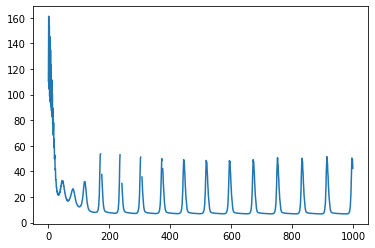

In [14]:
plt.plot(range(len(costs)), costs)

#### 上面从图上可以看出，它表现为周期震荡，下面减小学习率再试一下

In [15]:
params, grads, costs = optimize(w,b,X_train,y_train, 1000, 0.0001, print_cost=True)

Cost after iteration 0: 110.255460
Cost after iteration 100: 10.721706
Cost after iteration 200: 8.287618
Cost after iteration 300: 7.340625
Cost after iteration 400: 6.804498
Cost after iteration 500: 6.457119
Cost after iteration 600: 6.216145
Cost after iteration 700: 6.041676
Cost after iteration 800: 5.911463
Cost after iteration 900: 5.811967


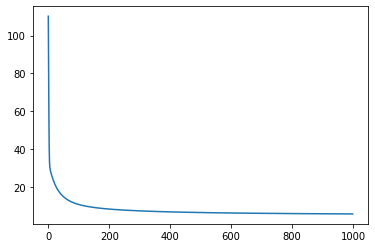

In [16]:
plt.plot(range(len(costs)), costs)

#### Perfect!

###### Exercise
The previous function will output the learned w and b. We are able to use w and b to predict the labels for a dataset X. Implement the predict() function.    
Two steps to finish this task:   
1. Calculate $\hat{Y} = A = \sigma(w^T*X+b)$   
2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector Y_prediction. If you wish, you can use an if/else statement in a for loop (though there is also a way to vectorize this).

In [17]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights
    b -- bias 
    X -- data 
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    m = X.shape[0]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[1],1)
    
    A = sigmoid(np.dot(X, w) + b).reshape(-1)
    
    for i in range(A.shape[0]):
        Y_prediction[0][i] = 1 if A[i] > 0.5 else 0
    
    assert(Y_prediction.shape == (1,m))
    
    return Y_prediction

Y_prediction = predict(params['w'], params['b'], X_test)
Y_prediction == y_test

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True, False,  True,
         True,  True,  True,  True, False,  True, False, False,  True,
         True,  True,  True,  True,  True,  True, False,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True, False,
        False,  True, False,  True,  True,  True,  True, False, False,
         True,  True, False,  True,  True,  True,  True,  True,  True,
         True, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True, False, False,  True,
         True,  True,  True, False,  True, False,  True,  True,  True,
      

##### 5- Merge all functions into a model

Congratulations !! You have finished all the necessary components for constructing a model. Now, Let's take the challenge to merge all the implemented function into one model.

In [18]:
from collections import Counter

In [19]:
def model(X_train, Y_train, X_test, Y_test, num_iterations, learning_rate, print_cost):
    """
    Build the logistic regression model by calling all the functions you have implemented.
    Arguments:
    X_train - training set
    Y_train - training label
    X_test - test set
    Y_test - test label
    num_iteration - hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d - dictionary should contain following information w,b,training_accuracy, test_accuracy,cost
    eg: d = {"w":w,
             "b":b,
             "training_accuracy": traing_accuracy,
             "test_accuracy":test_accuracy,
             "cost":cost}
    """
    w,b = initialize_parameters(X_train.shape[1])
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost=print_cost)
    
    Y_prediction = predict(params['w'], params['b'], X_train)
    counter = Counter(list((Y_prediction == Y_train).reshape(-1)))
    print(counter)
    traing_accuracy = counter[True]/len(Y_train)
    
    Y_prediction = predict(params['w'], params['b'], X_test)
    counter = Counter(list((Y_prediction == Y_test).reshape(-1)))
    print(counter)
    test_accuracy = counter[True]/len(Y_test)
    
    return {"w":w,
             "b":b,
             "training_accuracy": traing_accuracy,
             "test_accuracy":test_accuracy,
             "cost":costs}

result = model(X_train, y_train, X_test, y_test, 3000, 0.0001, print_cost=False)

Counter({True: 1220, False: 127})
Counter({True: 406, False: 44})


{'w': array([[-2.41308053e-02],
        [-3.50700015e-02],
        [-1.87764671e-01],
        [ 3.99822877e-02],
        [ 1.35791591e-01],
        [ 1.43835214e-01],
        [-9.97059284e-02],
        [-2.79689184e-02],
        [ 1.49922487e-01],
        [ 1.02568920e-01],
        [-7.98074479e-02],
        [-8.82175149e-03],
        [ 5.10757816e-02],
        [-4.01761316e-02],
        [ 1.93748582e-02],
        [-9.29386959e-02],
        [-1.17392875e-01],
        [-7.95940940e-02],
        [-7.31624642e-02],
        [-2.41289926e-01],
        [-1.56317390e-01],
        [-1.15473922e-01],
        [-1.48849138e-02],
        [-1.94439763e-04],
        [-1.27454391e-01],
        [ 1.01051679e-01],
        [-2.67024791e-01],
        [ 1.57104510e-01],
        [-5.00990015e-02],
        [ 1.04723681e-01],
        [ 1.44468530e-02],
        [-4.81253591e-02],
        [-5.71435776e-02],
        [-5.55200818e-02],
        [-1.18312127e-01],
        [ 2.85017572e-02],
        [-7.85108105e-0

In [26]:
print("training_accuracy", result["training_accuracy"])
print("test_accuracy", result["test_accuracy"])

training_accuracy 0.9057164068299925
test_accuracy 0.9022222222222223


In [20]:
import matplotlib.pyplot as plt

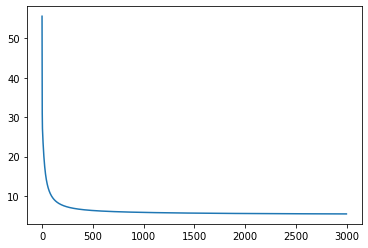

In [21]:
plt.plot(range(len(result['cost'])), result['cost'])


##### 用keras 看下能做到那一步

In [15]:
import keras

from keras.layers import Dense
from keras.models import Sequential

from collections import Counter

In [10]:
model = Sequential()

model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['mse'])

model.fit(X_train, y_train, epochs=500, batch_size=32)

    # print([(yp, yt) for yp, yt in zip(Y_prediction.reshape(-1), y_test)])

Instructions for updating:
Use tf.cast instead.
Epoch 1/500
1347/1347 [==============================] - 0s 299us/step - loss: 1.3403 - mse: 0.2660
Epoch 2/500
1347/1347 [==============================] - 0s 70us/step - loss: 0.7151 - mse: 0.1755
Epoch 3/500
1347/1347 [==============================] - 0s 56us/step - loss: 0.5161 - mse: 0.1306
Epoch 4/500
1347/1347 [==============================] - 0s 72us/step - loss: 0.4309 - mse: 0.1168

In [16]:
def see_result():
    Y_prediction = model.predict(X_train)
    Y_prediction = Y_prediction.reshape(-1)
    for i in range(Y_prediction.shape[0]):
            Y_prediction[i] = 1 if Y_prediction[i] > 0.5 else 0
    counter = Counter(list((Y_prediction == y_train).reshape(-1)))
    print(counter)
    traing_accuracy = counter[True]/len(y_train)
    
    Y_prediction = model.predict(X_test)
    Y_prediction = Y_prediction.reshape(-1)
    for i in range(Y_prediction.shape[0]):
            Y_prediction[i] = 1 if Y_prediction[i] > 0.5 else 0
    counter = Counter(list((Y_prediction == y_test).reshape(-1)))
    print(counter)
    test_accuracy = counter[True]/len(y_test)
    
    print(traing_accuracy, test_accuracy)
    

In [17]:
see_result()


Counter({True: 953, False: 394})
Counter({True: 311, False: 139})
0.7074981440237565 0.6911111111111111


In [18]:
model = Sequential()

model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['mse'])

model.fit(X_train, y_train, epochs=500, batch_size=32)

Epoch 1/500
1347/1347 [==============================] - 0s 187us/step - loss: 0.7679 - mse: 0.1909
Epoch 2/500
1347/1347 [==============================] - 0s 35us/step - loss: 0.2390 - mse: 0.0712
Epoch 3/500
1347/1347 [==============================] - 0s 93us/step - loss: 0.1854 - mse: 0.0535
Epoch 4/500
1347/1347 [==============================] - 0s 49us/step - loss: 0.1496 - mse: 0.0415
Epoch 5/500
1347/1347 [==============================] - 

In [19]:
see_result()

Counter({True: 1347})
Counter({True: 441, False: 9})
1.0 0.98


##### 用Keras尝试单层和多层网络，多层比单层结果好多了。

### 4.选做题

Congratulations on building your first logistic regression model. It is your time to analyze it further.

##### 4.1 Observe the effect of learning rate on the leraning process.   
Hits: plot the learning curve with different learning rate

当学习率是0.001时，模型输出的loss 表现为震荡下降，估计是学习率过高造成的，减小学习率为0.0001后，模型表现得很好。

##### 4.2 Observe the effect of iteration_num on the test accuracy.

当学习率为0.0001时
设置迭代次数为100时，观察到模型的cost还没有收敛到最小，所以最后准确率很低。
设置迭代次数为1000时，观察到模型的cost有收敛到较小，准确率一般。
设置迭代次数为3000时，观察到模型的cost有收敛到更小，准确率较高。
设置迭代次数为10000时，观察到模型的cost很早就已经收敛到和3000时差不多，训练花了很多时间，但准确率并没有提升。

